In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version = 1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

In [3]:
X_data = mnist['data']
y_data = mnist['target']
y_data = y_data.astype(np.uint8)

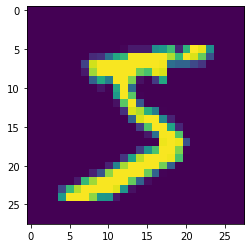

In [4]:
plt.imshow(np.array(X_data.iloc[0,:]).reshape(28,28))

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
scaler = StandardScaler()
X_data_scaled = scaler.fit_transform(X_data)

In [7]:
#splitting data into train sets, validation sets and test sets
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X_data_scaled, y_data, test_size=0.2, random_state=42)

In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.2,random_state=42)

In [9]:
import tensorflow as tf
from tensorflow import keras

In [10]:
#using the sequential API
model_init = keras.models.Sequential()
model_init.add(keras.layers.Input(shape = [784]))
model_init.add(keras.layers.Dense(300, activation = "relu"))
model_init.add(keras.layers.Dense(100, activation = "relu"))
model_init.add(keras.layers.Dense(10, activation = "softmax"))
#model_init.add(keras.layers.Dense(1, activation = give_predicted_mnist))

In [11]:
model_init.compile(optimizer = 'sgd', loss = "sparse_categorical_crossentropy")

In [12]:
history_init = model_init.fit(X_train, y_train, epochs = 30, validation_data=(X_valid, y_valid))

Epoch 1/30
1400/1400 [==============================] - 4s 3ms/step - loss: 0.7985 - val_loss: 0.2587
Epoch 2/30
1400/1400 [==============================] - 3s 2ms/step - loss: 0.2046 - val_loss: 0.2044
Epoch 3/30
1400/1400 [==============================] - 3s 2ms/step - loss: 0.1480 - val_loss: 0.1776
Epoch 4/30
1400/1400 [==============================] - 3s 2ms/step - loss: 0.1156 - val_loss: 0.1649
Epoch 5/30
1400/1400 [==============================] - 3s 2ms/step - loss: 0.0932 - val_loss: 0.1558
Epoch 6/30
1400/1400 [==============================] - 3s 2ms/step - loss: 0.0768 - val_loss: 0.1505
Epoch 7/30
1400/1400 [==============================] - 3s 2ms/step - loss: 0.0678 - val_loss: 0.1473
Epoch 8/30
1400/1400 [==============================] - 2s 2ms/step - loss: 0.0578 - val_loss: 0.1429
Epoch 9/30
1400/1400 [==============================] - 3s 2ms/step - loss: 0.0500 - val_loss: 0.1412
Epoch 10/30
1400/1400 [==============================] - 3s 2ms/step - loss: 0.044

In [13]:
#calculating precision
y_pred_init = model_init.predict(X_train)
result_train = np.array(tf.argmax(y_pred_init, axis = 1))

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, result_train)

array([[4434,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 5003,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    1, 4503,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 4564,    0,    0,    0,    0,    0,    0],
       [   0,    1,    0,    0, 4422,    0,    0,    0,    0,    2],
       [   0,    2,    0,    0,    0, 3999,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 4384,    0,    0,    0],
       [   0,    3,    0,    0,    0,    0,    0, 4638,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 4378,    0],
       [   0,    0,    0,    0,    0,    0,    0,    2,    0, 4464]],
      dtype=int64)

In [15]:
y_pred_valid = model_init.predict(X_valid)
result_valid = np.array(tf.argmax(y_pred_valid, axis = 1))

In [16]:
confusion_matrix(y_valid, result_valid)

array([[1105,    0,    1,    1,    1,    7,    4,    0,    4,    3],
       [   0, 1258,    4,    4,    0,    0,    0,    3,    4,    1],
       [   5,    1, 1066,   13,    4,    2,    4,    7,    4,    0],
       [   4,    2,    7, 1101,    1,   10,    0,    6,    9,    4],
       [   0,    1,    4,    0, 1077,    0,    8,    1,    1,   12],
       [   2,    1,    1,   10,    3, 1004,    8,    1,    6,    3],
       [  11,    4,    2,    0,    4,    8, 1060,    0,    7,    0],
       [   2,    1,    9,    5,    4,    1,    2, 1110,    3,   12],
       [   1,    8,    7,    7,    3,    8,    2,    1, 1044,    9],
       [   6,    3,    2,   11,    8,    1,    0,   16,    5, 1020]],
      dtype=int64)

In [47]:
def calculate_weightedprecision_score(ground_truth, predictions):
    confusion_mat = confusion_matrix(ground_truth, predictions)
    class_count = confusion_mat.shape[0]
    precision_list = list()
    for cl in range(0,class_count):
        column_sum = np.sum(confusion_mat[:,0])
        precision = confusion_mat[cl,cl]/column_sum
        precision_list.append(precision)
    #lets calculate weighted precision of this confusion matrix to obtain one precision for the entire confusion matrix
    total_instances_perclass = np.sum(confusion_mat,axis = 1).tolist()
    total_instances = np.sum(total_instances_perclass)
    weighted_precision = np.dot((total_instances_perclass/total_instances),np.array(precision_list))
    return weighted_precision

In [43]:
calculate_precision(confusion_matrix(y_valid, result_valid))

0.9577917505030181

In [56]:
#making a function to apply to GridSearchCV for hyperparameter tuning 
def build_model(n_hidden = 2, n_neurons = [300,100], learning_rate = 3e-3, input_shape = [784]):
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape = input_shape))
    if(n_hidden == len(n_neurons)):
        for layer in range(0,n_hidden):
            model.add(keras.layers.Dense(n_neurons[layer], activation = 'relu'))
    else:
        raise IndexError('Number of hidden layers should be equal to the number of neurons in the neurons list')
    #10 neurons because its 10 classes
    model.add(keras.layers.Dense(10,activation = 'softmax'))
    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(optimizer = 'sgd', loss = "sparse_categorical_crossentropy")
    return model

In [57]:
from sklearn.metrics import make_scorer
#Create a KerasRegressor based on the build_model function
keras_reg_mnist = keras.wrappers.scikit_learn.KerasClassifier(build_model)
#how to put a custom score to RandomizedSearchCV
weighted_precision_scorer = make_scorer(calculate_weightedprecision_score, greater_is_better = True)

In [58]:
from sklearn.model_selection import GridSearchCV
params = {
    "n_hidden":[2,3,4],
    "n_neurons":[[300,100],[400,300,100],[400,300,200,100]],
    "learning_rate":[3e-3,1e-2,3e-2]
}

grid_search_cv = GridSearchCV(keras_reg_mnist, param_grid = params,cv = 5, scoring = weighted_precision_scorer)

grid_search_cv.fit(X_train, y_train, epochs = 10, validation_data=(X_valid, y_valid), callbacks = [keras.callbacks.EarlyStopping(patience = 10)])

s)
  File "C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-56-3ff5404f13eb>", line 9, in build_model
    raise IndexError('Number of hidden layers should be equal to the number of neurons in the neurons list')
IndexError: Number of hidden layers should be equal to the number of neurons in the neurons list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_t

RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000023B8CB53880>, as the constructor either does not set or modifies parameter n_neurons

In [59]:
grid_search_cv.best_params_

{'learning_rate': 0.03, 'n_hidden': 3, 'n_neurons': [400, 300, 100]}

In [60]:
grid_search_cv.best_score_

0.9820149463100843

In [77]:
model_grid_search = keras.models.Sequential()
model_grid_search.add(keras.layers.Input(shape = [784]))
model_grid_search.add(keras.layers.Dense(400, activation = "relu"))
model_grid_search.add(keras.layers.Dense(300, activation = "relu"))
model_grid_search.add(keras.layers.Dense(100, activation = "relu"))
model_grid_search.add(keras.layers.Dense(10, activation = "softmax"))

In [78]:
lr = keras.optimizers.SGD(0.05)
model_grid_search.compile(optimizer=lr, loss = "sparse_categorical_crossentropy", metrics=['accuracy'])
history_grid_search = model_grid_search.fit(X_train, y_train, epochs = 30, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience = 10)])

Epoch 1/30
1400/1400 [==============================] - 6s 4ms/step - loss: 0.4873 - accuracy: 0.8654 - val_loss: 0.1661 - val_accuracy: 0.9526
Epoch 2/30
1400/1400 [==============================] - 5s 3ms/step - loss: 0.1087 - accuracy: 0.9681 - val_loss: 0.1308 - val_accuracy: 0.9626
Epoch 3/30
1400/1400 [==============================] - 5s 3ms/step - loss: 0.0598 - accuracy: 0.9824 - val_loss: 0.1165 - val_accuracy: 0.9675
Epoch 4/30
1400/1400 [==============================] - 5s 3ms/step - loss: 0.0378 - accuracy: 0.9904 - val_loss: 0.1090 - val_accuracy: 0.9707
Epoch 5/30
1400/1400 [==============================] - 5s 3ms/step - loss: 0.0223 - accuracy: 0.9941 - val_loss: 0.1124 - val_accuracy: 0.9713
Epoch 6/30
1400/1400 [==============================] - 5s 4ms/step - loss: 0.0113 - accuracy: 0.9979 - val_loss: 0.1156 - val_accuracy: 0.9730
Epoch 7/30
1400/1400 [==============================] - 5s 4ms/step - loss: 0.0089 - accuracy: 0.9983 - val_loss: 0.1212 - val_accuracy:

In [79]:
y_pred_valid_grid_search = model_grid_search.predict(X_valid)
result_valid_grid_search = np.array(tf.argmax(y_pred_valid_grid_search, axis = 1))

In [80]:
#precision on validation set
calculate_weightedprecision_score(y_valid, result_valid_grid_search)

0.9655139046359286

In [81]:
model_grid_search.evaluate(X_valid,y_valid)

350/350 [==============================] - 0s 1ms/step - loss: 0.1347 - accuracy: 0.9745


[0.13473497331142426, 0.9744642972946167]